# Letter Recognition
 Model Comparison

## Importing libraries

In [26]:
# image manipulation
import cv2

# data
from emnist import extract_training_samples,extract_test_samples

# visualisation
import matplotlib.pyplot as plt

# data manipulation
import pandas as pd
import numpy as np

# modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

import tensorflow as tf

## Useful functions

In [12]:
# from local image (png, jpg, ...) to data
def img_to_data(src,n):
    originalImage = cv2.imread(src)
    grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
    resizedImage = cv2.resize(grayImage, (n,n))
    rescaledImage = 16 - resizedImage*(16/255)
    return rescaledImage

# plot image
def show_char(d):
    plt.imshow(d, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

# prediction as letter
alphabet = np.array(["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"])
def alph_res(pred):
    return (alphabet[pred == max(pred)])

## Importing the Data 
emnist

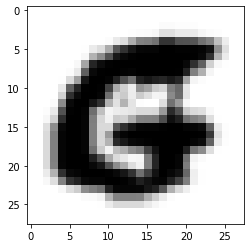

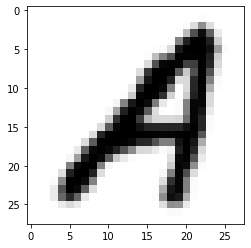

In [18]:
# data - letters
images, labels = extract_training_samples('letters')
t_images, t_labels = extract_test_samples('letters')

reshapedImages = images.reshape( (images.shape[0], 28*28))
t_reshapedImages = images.reshape( (images.shape[0], 28*28))

labels_binary = to_categorical(labels - 1)


show_char(images[1])
show_char(t_images[1])

## Models

#### A simple neural network

In [33]:
# model - letters
n_cols = len(reshapedImages[1])

model = Sequential()
model.add(Dense(784, activation="relu", input_shape = (n_cols,)))
model.add(Dense(1000, activation="relu"))
model.add(Dense(500, activation="relu"))
model.add(Dense(26,activation="softmax"))
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics = ["accuracy"])

early_stopping_monitor = EarlyStopping(patience = 5)

tf.config.run_functions_eagerly(False)
model.fit(reshapedImages,
            labels_binary,
            epochs=20,
            validation_split=.2,
            callbacks=[early_stopping_monitor])

Epoch 1/20
3120/3120 [==============================] - 45s 14ms/step - loss: 1.2897 - accuracy: 0.7431 - val_loss: 0.6512 - val_accuracy: 0.8085
Epoch 2/20
3120/3120 [==============================] - 46s 15ms/step - loss: 0.5911 - accuracy: 0.8229 - val_loss: 0.5227 - val_accuracy: 0.8448
Epoch 3/20
3120/3120 [==============================] - 46s 15ms/step - loss: 0.5222 - accuracy: 0.8446 - val_loss: 0.5698 - val_accuracy: 0.8385
Epoch 4/20
3120/3120 [==============================] - 46s 15ms/step - loss: 0.4808 - accuracy: 0.8594 - val_loss: 0.4894 - val_accuracy: 0.8609
Epoch 5/20
3120/3120 [==============================] - 47s 15ms/step - loss: 0.4441 - accuracy: 0.8705 - val_loss: 0.5252 - val_accuracy: 0.8597
Epoch 6/20
3120/3120 [==============================] - 47s 15ms/step - loss: 0.4191 - accuracy: 0.8815 - val_loss: 0.4920 - val_accuracy: 0.8703
Epoch 7/20
3120/3120 [==============================] - 47s 15ms/step - loss: 0.3974 - accuracy: 0.8880 - val_loss: 0.5383 -

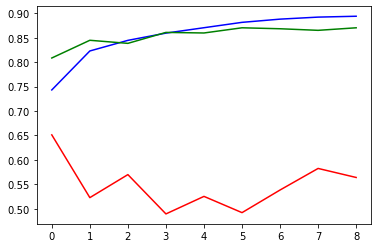

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_10 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_11 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_12 (Dense)             (None, 26)                13026     
Total params: 1,913,966
Trainable params: 1,913,966
Non-trainable params: 0
_________________________________________________________________


In [34]:
plt.plot(model.history.history['val_loss'], 'r')
plt.plot(model.history.history['accuracy'], 'b')
plt.plot(model.history.history['val_accuracy'], 'g')
plt.show()
model.summary()

['q']


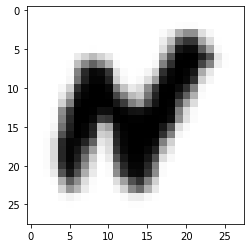

['i']


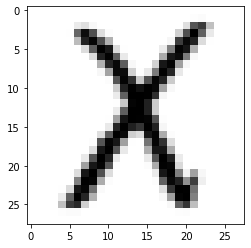

['s']


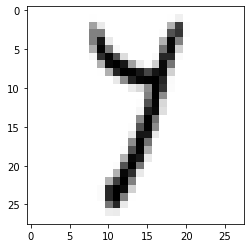

['o']


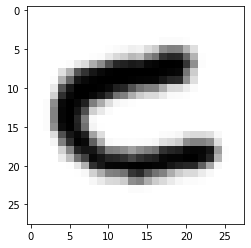

['w']


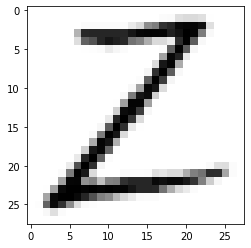

['u']


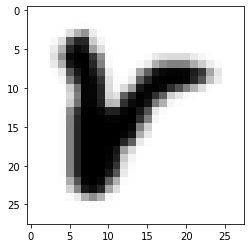

['v']


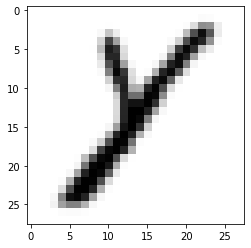

['u']


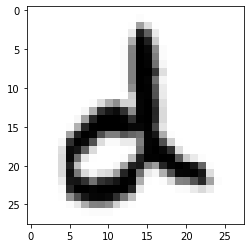

['v']


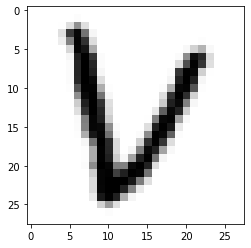

['s']


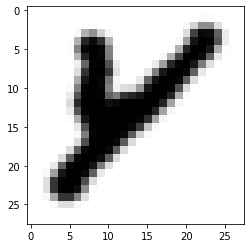

In [35]:
pred = model.predict(t_reshapedImages)

for i in np.random.randint(low=1,high=20800,size=10):
    print(alph_res(pred[i]))
    show_char(t_images[i])

## A simple convolutional neural net model

In [ ]:
model = Sequential()
model.add(Conv2D(50, kernel_size=(4, 4),activation='relu',input_shape=(28,28,1),padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
# model.add(Conv2D(10, kernel_size=(2, 2),activation='relu',padding='same'))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))         
model.add(Dense(26,activation="softmax"))
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics = ["accuracy"])

conv_images = images.reshape(-1, 28,28, 1).astype('float32')

tf.config.run_functions_eagerly(True)

model.fit(conv_images,
            labels_binary,
            epochs=100,
            validation_split=.2,
            callbacks=[early_stopping_monitor])


tf.config.run_functions_eagerly(False)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
Epoch 1/100
3120/3120 [==============================] - 257s 82ms/step - loss: 15.4983 - accuracy: 0.0384 - val_loss: 15.4956 - val_accuracy: 0.0386
Epoch 2/100
3120/3120 [==============================] - 252s 81ms/step - loss: 15.4985 - accuracy: 0.0384 - val_loss: 15.4956 - val_accuracy: 0.0386
Epoch 3/100
3120/3120 [==============================] - 252s 81ms/step - loss: 15.4985 - accuracy: 0.0384 - val_loss: 15.4956 - val_accuracy: 0.0386
Epoch 4/100
3120/3120 [==============================] - 260s 83ms/step - loss: 15.4985 - accuracy: 0.0384 - val_loss: 15.4956 - val_accuracy: 0.0386
Epoch 5/100
 694/3120 [=====>........................] - ETA: 2:56 - loss: 15.5070 - accuracy: 0.0379

In [ ]:
conv_test = t_images.reshape(-1, 28,28, 1).astype('float32')
conv_pred = model.predict(conv_test)

for i in np.random.randint(low=1,high=20800,size=10):
    print(alph_res(conv_pred[i]))
    show_char(t_images[i])

In [71]:
model.save('../static/models/conv_model.h5',overwrite=True)

In [29]:
model = DecisionTreeClassifier(max_depth=10)
model.fit(X=reshapedImages,y=labels)
model.score(X=reshapedImages,y=labels)

0.6862980769230769

In [30]:
model = LogisticRegression()
model.fit(X=reshapedImages,y = labels)
model.score(X=reshapedImages,y = labels)

C:\Users\44751\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7269711538461539

In [32]:
model = RandomForestClassifier(max_depth=10)
model.fit(X=reshapedImages,y = labels)
model.score(X=reshapedImages,y = labels)

0.8334455128205128